In [1]:
from td_utils import load_raw_audio_with_folder
from td_utils import load_raw_audio
from mix_audio import create_training_data
from utils import make_dir

import os
import numpy as np
from tqdm import tqdm
import IPython
import matplotlib.pyplot as plt

In [2]:
version = 'train'

In [3]:
make_dir('./data/{}_audios'.format(version))
make_dir('./data/XY_{}'.format(version))

In [4]:
# 여기서 데이터 불러오기
if version == 'train':
    audio_dir = os.path.join('.','data','audio_label_clip')
else:
    audio_dir = os.path.join('.','data','audio_label_clip_for_test')

activates, negatives, backgrounds = load_raw_audio_with_folder(audio_dir)


./data/audio_label_clip/background
./data/audio_label_clip/.DS_Store
./data/audio_label_clip/snore
./data/audio_label_clip/negative
./data/audio_label_clip/others
./data/audio_label_clip/train.zip


In [11]:
# backgrounds

In [12]:

num_of_data = 2

for i in tqdm(range(num_of_data)):
    j = np.random.randint(0, len(backgrounds))
    # background 하나만 뽑기
    background = backgrounds[j]
    # activate negative는 여러개 뽑기?
    x,x_minus, y = create_training_data(background, 
                               activates, 
                               negatives, 
                               filename='./data/{}_audios/mix_{}.wav'.format(version, i))
    x = np.transpose(x)
    y = np.transpose(y)
    np.save('./data/XY_{}/x_{}'.format(version, i),x)
    np.save('./data/XY_{}/y_{}'.format(version, i),y)

In [7]:
print(x.shape, y.shape)

(862, 128) (212, 1)


In [13]:
# IPython.display.Audio("./data/{}_audios/mix_{}.wav".format(version, num_of_data-1))

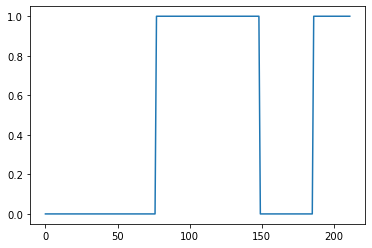

In [9]:
plt.plot(np.load('./data/XY_{}/y_{}.npy'.format(version, num_of_data-1)))

In [5]:
from mix_audio import create_training_data